In [1]:
from hilbertcurve.hilbertcurve import HilbertCurve
import numpy as np

hilbert_curve = HilbertCurve(5, 2)

# Load training data from cb6133
training_data = np.load('../data/cb513.npy')

# Pick the first sample (sequence) and reshape it to 700 x 57 (sequence length x features+labels) 
first_sequence = training_data[0,:].reshape((700,57))

# Padding element
no_seq_feat = first_sequence[-1,np.r_[:22, 35:57]]
no_seq_out = first_sequence[-1,22:31]

# lists to save hilbert images (input and output)
hilbert_images = []
hilbert_output_images = []

# for every sequence
for i in range(training_data.shape[0]):
    
    # get sequence from set
    sequence = training_data[i,:].reshape((700,57))
    
    #initialize images (in and out)
    hi = np.zeros((32,32,44))
    ho = np.zeros((32,32,9)) 

    # 1024 = 2^5 the smallest power of two which is larger than 700 (max len of sequence)
    for j in range(1024):
        # get hilbert coordinates
        c0,c1 = hilbert_curve.coordinates_from_distance(j)
        
        # extract information of input (residue one hot and PSSM), structure for output
        if j<700: 
            # in sequence
            hi[c0,c1,:] = sequence[j,np.r_[:22, 35:57]]
            ho[c0,c1,:] = sequence[j,22:31]
        else:
            # padding
            hi[c0,c1,:] = no_seq_feat    
            ho[c0,c1,:] = no_seq_out
    
    # put in lists
    hilbert_images.append(hi)
    hilbert_output_images.append(ho)

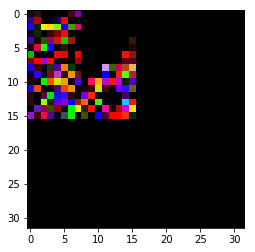

In [4]:
import matplotlib.pyplot as plt
plt.imshow(hilbert_images[50][:,:,22:25])

In [6]:
for i,(ii,io) in enumerate(zip(hilbert_images, hilbert_output_images)):
    np.save('../data/hilbert_test/input/test_in_{}.npy'.format(i), ii)
    np.save('../data/hilbert_test/output/test_out_{}.npy'.format(i), io)